# Housing price analysis using Linear, Ridge and Lasso Regression 
 
   ### Approach is dividend into below sections:
     1. Exploratory data analysis ( EDA)
     2. Data Cleaning
     3. Data Preparation
     4. Model building and evaluation using Linear regression, Ridge and Lasso Regresion 
     5. Conclusion 

#   Exploratory data analysis ( EDA)

In [249]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [250]:
# reading data from csv
housingdata= pd.read_csv('train.csv')

In [251]:
housingdata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [252]:
housingdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Analysis based on info command
1. Data set has around 81 columns and 1460 rows
2. Few of the columns have null values. 
3. PoolQC,Fence, MiscFeature,FireplaceQu,Alley these columns have lot of null values, hence dropping them            

In [253]:
del housingdata['PoolQC']
del housingdata['Fence']
del housingdata['MiscFeature']
del housingdata['FireplaceQu']
del housingdata['Alley']

In [254]:
# As we dropped 5 columns , total columns should be around 76

housingdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [255]:
# For Garage related data
#  81 rows do not have any information on Garage, we can either delete this rows or consider that the house does not has garage.
# Compared to data set of count 1460 , 81 rows are just 5.5% hence instead of making assumptions deleting below rows. 
housingdata[['GarageType','GarageYrBlt','GarageFinish','GarageArea','GarageQual']][housingdata['GarageQual'].isnull()]

,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual
39,NaN,NaN,NaN,0,NaN
48,NaN,NaN,NaN,0,NaN
78,NaN,NaN,NaN,0,NaN
88,NaN,NaN,NaN,0,NaN
89,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...
1349,NaN,NaN,NaN,0,NaN
1407,NaN,NaN,NaN,0,NaN
1449,NaN,NaN,NaN,0,NaN
1450,NaN,NaN,NaN,0,NaN


In [256]:
housingdata['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [257]:
# Dropping rows with null values for Garage
housingdata=housingdata[~housingdata['GarageType'].isnull()]
            

In [258]:
housingdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1379 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1379 non-null   int64  
 1   MSSubClass     1379 non-null   int64  
 2   MSZoning       1379 non-null   object 
 3   LotFrontage    1127 non-null   float64
 4   LotArea        1379 non-null   int64  
 5   Street         1379 non-null   object 
 6   LotShape       1379 non-null   object 
 7   LandContour    1379 non-null   object 
 8   Utilities      1379 non-null   object 
 9   LotConfig      1379 non-null   object 
 10  LandSlope      1379 non-null   object 
 11  Neighborhood   1379 non-null   object 
 12  Condition1     1379 non-null   object 
 13  Condition2     1379 non-null   object 
 14  BldgType       1379 non-null   object 
 15  HouseStyle     1379 non-null   object 
 16  OverallQual    1379 non-null   int64  
 17  OverallCond    1379 non-null   int64  
 18  YearBuil

In [259]:
# dropping the rows with LotFrontage null values

housingdata=housingdata[~housingdata['LotFrontage'].isnull()]
 

In [307]:
housingdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1127 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1127 non-null   int64  
 1   MSSubClass     1127 non-null   object 
 2   MSZoning       1127 non-null   object 
 3   LotFrontage    1127 non-null   float64
 4   LotArea        1127 non-null   int64  
 5   Street         1127 non-null   object 
 6   LotShape       1127 non-null   object 
 7   LandContour    1127 non-null   object 
 8   Utilities      1127 non-null   object 
 9   LotConfig      1127 non-null   object 
 10  LandSlope      1127 non-null   object 
 11  Neighborhood   1127 non-null   object 
 12  Condition1     1127 non-null   object 
 13  Condition2     1127 non-null   object 
 14  BldgType       1127 non-null   object 
 15  HouseStyle     1127 non-null   object 
 16  OverallQual    1127 non-null   int64  
 17  OverallCond    1127 non-null   int64  
 18  YearBuil

In [310]:
housingdata=housingdata.dropna()

In [313]:
housingdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1094 non-null   int64  
 1   MSSubClass     1094 non-null   object 
 2   MSZoning       1094 non-null   object 
 3   LotFrontage    1094 non-null   float64
 4   LotArea        1094 non-null   int64  
 5   Street         1094 non-null   object 
 6   LotShape       1094 non-null   object 
 7   LandContour    1094 non-null   object 
 8   Utilities      1094 non-null   object 
 9   LotConfig      1094 non-null   object 
 10  LandSlope      1094 non-null   object 
 11  Neighborhood   1094 non-null   object 
 12  Condition1     1094 non-null   object 
 13  Condition2     1094 non-null   object 
 14  BldgType       1094 non-null   object 
 15  HouseStyle     1094 non-null   object 
 16  OverallQual    1094 non-null   int64  
 17  OverallCond    1094 non-null   int64  
 18  YearBuil

In [314]:
# Cleaning up null values 
housingdata.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

In [315]:
# rows with more than 10 columns as null. Random check for null values

housingdata.iloc[housingdata[(housingdata.isnull().sum(axis=1) >=10)].index]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


#### We only have very few null values on few columns and we are good with the data with respect to null values

#### Checking column names and data types


In [316]:
housingdata.describe()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,...,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000
mean,727.375686,70.759598,10132.346435,6.247715,5.575868,1972.412249,1985.915905,109.855576,448.191956,45.252285,...,94.341865,46.946984,22.053016,3.266910,16.498172,3.007313,23.550274,6.335466,2007.786106,187033.263254
std,420.955488,24.508859,8212.249621,1.366797,1.066500,31.189752,20.930772,190.667459,468.728095,159.075003,...,122.624615,64.820019,61.570502,29.655973,58.455303,40.713175,167.135237,2.694558,1.334307,83165.332151
min,1.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,366.500000,60.000000,7606.750000,5.000000,5.000000,1953.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,132500.000000
50%,723.500000,70.000000,9444.500000,6.000000,5.000000,1975.000000,1995.000000,0.000000,384.500000,0.000000,...,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,165750.000000
75%,1093.750000,80.000000,11387.250000,7.000000,6.000000,2003.000000,2005.000000,171.750000,712.750000,0.000000,...,169.750000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,221000.000000
max,1460.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,648.000000,2500.000000,12.000000,2010.000000,755000.000000


In [317]:
# Checking column names
housingdata.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [318]:
# Checking for data types
housingdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1094 non-null   int64  
 1   MSSubClass     1094 non-null   object 
 2   MSZoning       1094 non-null   object 
 3   LotFrontage    1094 non-null   float64
 4   LotArea        1094 non-null   int64  
 5   Street         1094 non-null   object 
 6   LotShape       1094 non-null   object 
 7   LandContour    1094 non-null   object 
 8   Utilities      1094 non-null   object 
 9   LotConfig      1094 non-null   object 
 10  LandSlope      1094 non-null   object 
 11  Neighborhood   1094 non-null   object 
 12  Condition1     1094 non-null   object 
 13  Condition2     1094 non-null   object 
 14  BldgType       1094 non-null   object 
 15  HouseStyle     1094 non-null   object 
 16  OverallQual    1094 non-null   int64  
 17  OverallCond    1094 non-null   int64  
 18  YearBuil

1. Data type of the columns look good. No issues observed
2. float columns -3 , Int columns - 35 and Object columns - 38 


In [319]:
housingdata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


 ### Exploring about columns

In [320]:
# MS SubClass column 
# type of the building
housingdata['MSSubClass'].value_counts()

20     411
60     227
50     114
120     66
160     53
70      52
30      47
80      37
90      24
190     19
75      13
85      13
45       9
180      6
40       3
Name: MSSubClass, dtype: int64

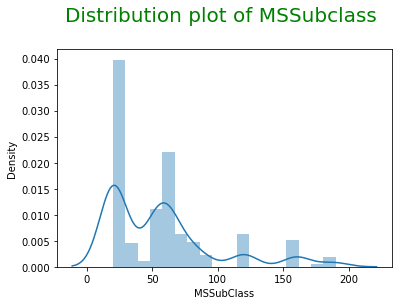

In [321]:
plt.title("Distribution plot of MSSubclass \n", fontdict={'fontsize':20, 'fontweight':5, 'color':'Green'})
sns.distplot(housingdata['MSSubClass'])
plt.show()

In [322]:
# Checking the target variable price
housingdata['SalePrice'].describe()

count      1094.000000
mean     187033.263254
std       83165.332151
min       35311.000000
25%      132500.000000
50%      165750.000000
75%      221000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:title={'center':'Distribution plot of SalesPrice \n'}, xlabel='SalePrice', ylabel='Density'>

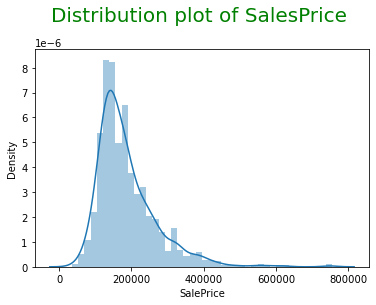

In [323]:
plt.title("Distribution plot of SalesPrice \n", fontdict={'fontsize':20, 'fontweight':5, 'color':'Green'})
sns.distplot(housingdata['SalePrice'])
#plt.show()

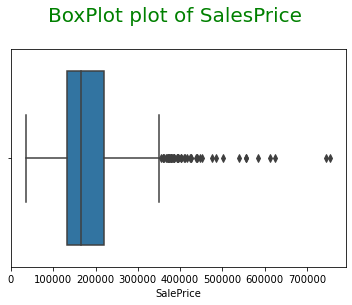

In [324]:
#Looks like we have some outliers in the data
plt.title("BoxPlot plot of SalesPrice \n", fontdict={'fontsize':20, 'fontweight':5, 'color':'Green'})
sns.boxplot(housingdata['SalePrice'])
plt.show()

## Data Exploration

In [325]:
# taking the numeric variable 
housingdata_numeric= housingdata.select_dtypes(include=['float64','int64'])
housingdata_numeric.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [326]:
# dropping id column as this is just a number 
housingdata_numeric= housingdata_numeric.drop(['Id'], axis=1)
 

In [327]:
housingdata_numeric.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [328]:
# Generating a correlation matrix to view the correlation 
cor= housingdata_numeric.corr()
cor

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
LotFrontage,1.000000,0.419714,0.241169,-0.047132,0.107958,0.082938,0.189769,0.239734,0.046928,0.111368,...,0.081338,0.160862,0.016058,0.073004,0.034937,0.211959,0.000789,0.014951,0.013366,0.343978
LotArea,0.419714,1.000000,0.169876,-0.033113,0.028954,0.024308,0.106600,0.232341,0.138615,0.008924,...,0.133995,0.098051,-0.022789,0.013343,0.072413,0.109294,0.012483,0.006270,-0.006412,0.302268
OverallQual,0.241169,0.169876,1.000000,-0.189587,0.590761,0.568582,0.419756,0.230438,-0.081342,0.297384,...,0.273652,0.335884,-0.155080,0.020081,0.049286,0.080037,-0.062944,0.082995,-0.003529,0.795437
OverallCond,-0.047132,-0.033113,-0.189587,1.000000,-0.437647,0.024427,-0.174581,-0.068285,0.040598,-0.169743,...,-0.018856,-0.084405,0.067124,-0.010881,0.084416,-0.024919,0.121407,-0.009661,0.046775,-0.138511
YearBuilt,0.107958,0.028954,0.590761,-0.437647,1.000000,0.625905,0.328897,0.234207,-0.058987,0.170077,...,0.236512,0.235486,-0.399540,0.030743,-0.065413,0.006402,-0.098054,0.014127,-0.003639,0.523434
YearRemodAdd,0.082938,0.024308,0.568582,0.024427,0.625905,1.000000,0.187492,0.111675,-0.063813,0.187505,...,0.240775,0.259469,-0.220843,0.020567,-0.038039,0.018813,-0.040388,0.031242,0.037684,0.519806
MasVnrArea,0.189769,0.106600,0.419756,-0.174581,0.328897,0.187492,1.000000,0.281356,-0.080799,0.100304,...,0.172564,0.127648,-0.124837,0.022347,0.050990,0.021251,-0.054042,0.012993,-0.015395,0.485409
BsmtFinSF1,0.239734,0.232341,0.230438,-0.068285,0.234207,0.111675,0.281356,1.000000,-0.046328,-0.550064,...,0.198025,0.119597,-0.109888,0.025332,0.054479,0.195060,0.002687,-0.017023,0.015389,0.378678
BsmtFinSF2,0.046928,0.138615,-0.081342,0.040598,-0.058987,-0.063813,-0.080799,-0.046328,1.000000,-0.239976,...,0.030734,0.008995,0.047798,-0.030389,0.067083,0.061174,0.014589,-0.039888,0.036587,-0.036923
BsmtUnfSF,0.111368,0.008924,0.297384,-0.169743,0.170077,0.187505,0.100304,-0.550064,-0.239976,1.000000,...,-0.012039,0.140096,-0.039339,0.026774,-0.014145,-0.057089,-0.040087,0.029186,-0.018386,0.191247


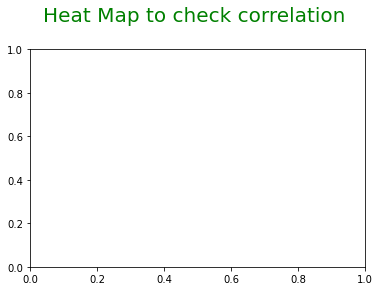

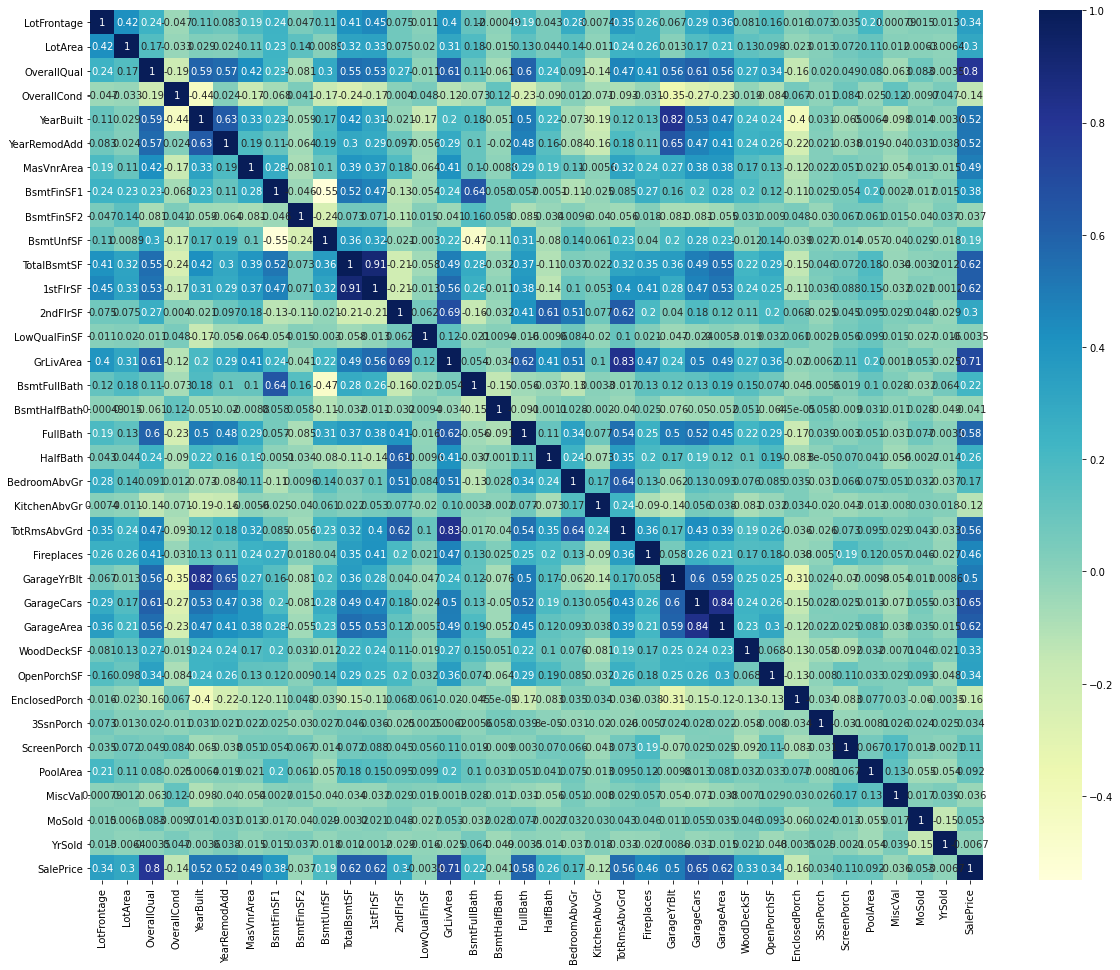

In [329]:
# Creating a heat map 
plt.title("Heat Map to check correlation \n", fontdict={'fontsize':20, 'fontweight':5, 'color':'Green'})
plt.figure(figsize=(20,16))
sns.heatmap(cor, cmap='YlGnBu', annot=True)
plt.show()

### Analysis from heatmap

1. SalesPrice is highly correlated with TotalBSMTSf, GarageCars, OverallQual
2. SalesPrice is negatively correlated with YrSold

## Data Cleaning

1. We have already cleaned up data with respect to null values. 


In [330]:
housingdata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [331]:
# MSSubclass is a categorical variable

In [332]:
housingdata['MSSubClass'].value_counts()

20     411
60     227
50     114
120     66
160     53
70      52
30      47
80      37
90      24
190     19
75      13
85      13
45       9
180      6
40       3
Name: MSSubClass, dtype: int64

In [333]:
#MsSubclass is categorical, hence converting it to object data type
housingdata['MSSubClass']=housingdata['MSSubClass'].astype('object')

In [334]:
housingdata['MSZoning'].value_counts()

RL         850
RM         173
FV          54
RH           9
C (all)      8
Name: MSZoning, dtype: int64

In [335]:
housingdata['Street'].value_counts()

Pave    1090
Grvl       4
Name: Street, dtype: int64

In [336]:
housingdata['YrSold'].value_counts()

2006    247
2009    247
2007    245
2008    226
2010    129
Name: YrSold, dtype: int64

In [337]:
housingdata['OverallQual'].value_counts()

5     292
6     270
7     259
8     139
4      66
9      42
10     16
3       8
2       2
Name: OverallQual, dtype: int64

In [338]:
housingdata['MoSold'].value_counts()

7     185
6     183
5     148
4     106
8      93
3      74
10     71
11     59
9      49
1      44
2      42
12     40
Name: MoSold, dtype: int64

In [339]:
housingdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1094 non-null   int64  
 1   MSSubClass     1094 non-null   object 
 2   MSZoning       1094 non-null   object 
 3   LotFrontage    1094 non-null   float64
 4   LotArea        1094 non-null   int64  
 5   Street         1094 non-null   object 
 6   LotShape       1094 non-null   object 
 7   LandContour    1094 non-null   object 
 8   Utilities      1094 non-null   object 
 9   LotConfig      1094 non-null   object 
 10  LandSlope      1094 non-null   object 
 11  Neighborhood   1094 non-null   object 
 12  Condition1     1094 non-null   object 
 13  Condition2     1094 non-null   object 
 14  BldgType       1094 non-null   object 
 15  HouseStyle     1094 non-null   object 
 16  OverallQual    1094 non-null   int64  
 17  OverallCond    1094 non-null   int64  
 18  YearBuil

## Data preparation

In [340]:
# splitting into X and Y variable 
X=housingdata[:]
del X['SalePrice']
 
y= housingdata['SalePrice']

housingdata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [341]:
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,84,0,0,0,0,0,12,2008,WD,Normal


In [342]:
# Taking the categorical variable

housingdata_cat= X.select_dtypes(include=['object'])
housingdata_cat.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [343]:
# converting to dummies
housingdata_dummies=pd.get_dummies(housingdata_cat, drop_first=True)
housingdata_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [344]:
#dropping categorical variables
X=X.drop(list(housingdata_cat.columns),axis=1)

In [345]:
#concatenating dummy variables
X=pd.concat([X,housingdata_dummies],axis=1)

In [346]:
X.head()
del X['Id']

In [347]:
X.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,...,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000
mean,70.759598,10132.346435,6.247715,5.575868,1972.412249,1985.915905,109.855576,448.191956,45.252285,606.117002,...,0.002742,0.003656,0.106033,0.000914,0.848263,0.000914,0.005484,0.016453,0.804388,0.108775
std,24.508859,8212.249621,1.366797,1.066500,31.189752,20.930772,190.667459,468.728095,159.075003,445.834636,...,0.052318,0.060384,0.308021,0.030234,0.358930,0.030234,0.073888,0.127269,0.396853,0.311499
min,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,7606.750000,5.000000,5.000000,1953.000000,1967.000000,0.000000,0.000000,0.000000,270.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,70.000000,9444.500000,6.000000,5.000000,1975.000000,1995.000000,0.000000,384.500000,0.000000,525.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,80.000000,11387.250000,7.000000,6.000000,2003.000000,2005.000000,171.750000,712.750000,0.000000,846.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [348]:
y.describe()

count      1094.000000
mean     187033.263254
std       83165.332151
min       35311.000000
25%      132500.000000
50%      165750.000000
75%      221000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [349]:
# scaling features - preapring for Ridge and Lasso regression 
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=234)

In [350]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

### Model Building and Evaluation 

## Linear Regression 

In [352]:
# Instantiating linear regression object
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [353]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-18068819493886.695
[ 2.86034055e+03  8.12514462e+03  1.02145766e+04  5.68106221e+03
  5.73372790e+03  3.80578121e+03  6.35685684e+03 -2.50983445e+15
 -8.51777241e+14 -2.38724996e+15  2.22670208e+15  4.21270101e+15
  4.77322457e+15  4.57478124e+14 -5.71713198e+15 -8.90703125e+02
  3.95796875e+02  2.64214844e+03  9.54765625e+01 -1.28579688e+03
 -1.82267188e+03 -3.65593750e+03  4.28437500e+01  1.23456250e+03
  5.15840625e+03 -1.43875000e+03  2.17112500e+03 -5.51187500e+02
  3.52593750e+02  1.27610156e+03  2.07684766e+03  5.25467188e+03
  5.55656250e+02 -7.10156250e+01 -6.50562500e+02  1.79587500e+03
  5.38019531e+02  1.30757812e+03  4.16970312e+03  6.41598047e+03
  2.07525000e+03  2.21396875e+03 -2.68010938e+03 -6.94937500e+02
 -2.63198712e+13 -3.72329191e+15 -3.35754514e+15 -1.15491131e+15
  2.13951562e+03  6.11828125e+03  1.06509375e+03  6.48295312e+03
  5.33240625e+03  2.98850000e+03  1.17495312e+03  7.86250000e+01
 -2.33656250e+02  1.23851562e+03 -2.88025000e+03  6.35687500e+02
  3.4

In [354]:
from sklearn.metrics import r2_score, mean_squared_error

In [355]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9519830435452913
-3.6321712381101566e+20
252027152931.55353
8.39345085490532e+32
329447258.7340569
2.551200867752377e+30


### Ridge and Lasso Regression

## Ridge regression

In [356]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [357]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [358]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 1.06888087e+03  3.89165837e+03  8.28222908e+03  2.26465069e+03
  1.74130599e+03  2.93631477e+03  4.34757062e+03  2.98148068e+03
  8.75982708e+02 -1.76298292e+02  3.50666442e+03  4.98365214e+03
  4.90347039e+03  8.25909974e+02  7.83222035e+03  1.80534592e+03
  4.76058720e+02  4.23761326e+03  1.71089732e+03  4.43921229e+02
 -2.14947058e+03  4.62349257e+03  3.23560427e+03  1.03776798e+03
  5.00107653e+03  3.08978441e+03  2.19791921e+03  8.23008960e+02
 -6.46637283e+02  1.44225025e+03  1.95968958e+03  3.83930542e+02
 -9.28874144e+01  1.60731450e+02  2.48926909e+00 -1.84612987e+02
  7.67242620e+00  8.68032102e+01 -5.88675635e+02  7.97960319e+02
  6.73840845e+02  5.71732946e+02 -6.32858702e+02 -6.23798148e+01
 -9.39298899e+02 -1.24883410e+03 -1.83620702e+03 -2.33839614e+02
 -5.30340292e+02  9.13344296e+02 -2.67460976e+01  9.94008949e+02
 -1.15036175e+03  2.08485595e+03  1.26679976e+03 -2.83746799e+03
 -1.98994067e+03  1.16693975e+03 -1.86801660e+01  9.53888246e+02
  2.88809625e+03 -5.41597

In [359]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8760406067248062
0.8362695848389753
650627096611.956
378358591326.312
850492936.7476549
1150026113.453836


### Lasso Regression

In [360]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [361]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [362]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised

alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=500)

In [363]:
lasso.coef_

array([ 0.00000000e+00,  6.31103833e+03,  1.35663052e+04,  4.97836184e+03,
        6.08808328e+03,  2.68829252e+03,  4.28353887e+03,  6.66756572e+03,
        8.53289724e+02, -0.00000000e+00,  1.61456146e+03,  0.00000000e+00,
        2.35425206e+02, -0.00000000e+00,  3.30282109e+04,  5.14489725e+02,
        0.00000000e+00,  3.27503576e+03,  0.00000000e+00, -1.01264143e+03,
       -4.04173779e+03,  0.00000000e+00,  3.29108004e+01,  0.00000000e+00,
        6.50985914e+03,  0.00000000e+00,  1.28566429e+03,  0.00000000e+00,
       -0.00000000e+00,  1.20889794e+03,  1.99629454e+03,  2.22040822e+03,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  7.43787765e+01,
       -0.00000000e+00,  0.00000000e+00, -7.93796627e+02,  0.00000000e+00,
       -1.59956308e+01, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -8.48314782e+02, -1.72526322e+03, -2.97834836e+03,  0.00000000e+00,
        0.00000000e+00,  1.28259487e+03, -0.00000000e+00,  0.00000000e+00,
       -1.01501968e+02,  

In [364]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9325383040934242
0.7390357479782821
354086981071.0637
603052686847.1902
462858798.7857042
1832986890.11304


In [365]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.519830e-01,8.760406e-01,9.325383e-01
1,R2 Score (Test),-3.632171e+20,8.362696e-01,7.390357e-01
2,RSS (Train),2.520272e+11,6.506271e+11,3.540870e+11
3,RSS (Test),8.393451e+32,3.783586e+11,6.030527e+11
4,MSE (Train),1.815068e+04,2.916321e+04,2.151415e+04
5,MSE (Test),1.597248e+15,3.391203e+04,4.281340e+04


### Checking the coefficient changes after regularization

In [366]:
betas = pd.DataFrame(index=X.columns)

In [367]:
betas.rows = X.columns

In [368]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [371]:
pd.set_option('display.max_rows', None)
betas.head(250)

,Linear,Ridge,Lasso
LotFrontage,2.860341e+03,1.068881e+03,0.000000
LotArea,8.125145e+03,3.891658e+03,6311.038328
OverallQual,1.021458e+04,8.282229e+03,13566.305150
OverallCond,5.681062e+03,2.264651e+03,4978.361843
YearBuilt,5.733728e+03,1.741306e+03,6088.083283
YearRemodAdd,3.805781e+03,2.936315e+03,2688.292523
MasVnrArea,6.356857e+03,4.347571e+03,4283.538866
BsmtFinSF1,-2.509834e+15,2.981481e+03,6667.565715
BsmtFinSF2,-8.517772e+14,8.759827e+02,853.289724
BsmtUnfSF,-2.387250e+15,-1.762983e+02,-0.000000
